# Keras Regression Project

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
#Check any null value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Statistical summary of the data
df.describe().transpose()

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Data Visualization Analysis

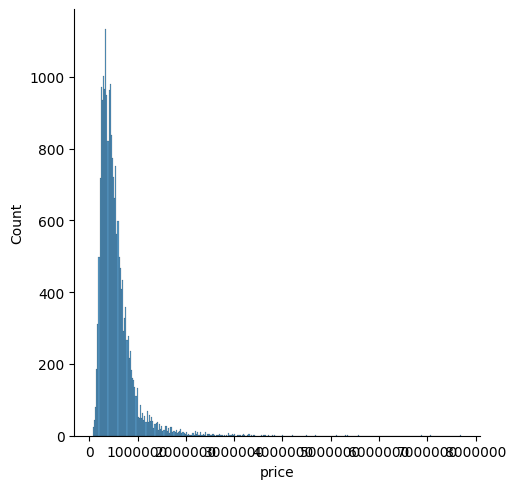

In [8]:
#plt.figure(figsize=(12,8))
sns.displot(df['price'])
plt.ticklabel_format(style='plain', axis='both')



<AxesSubplot: xlabel='bedrooms', ylabel='count'>

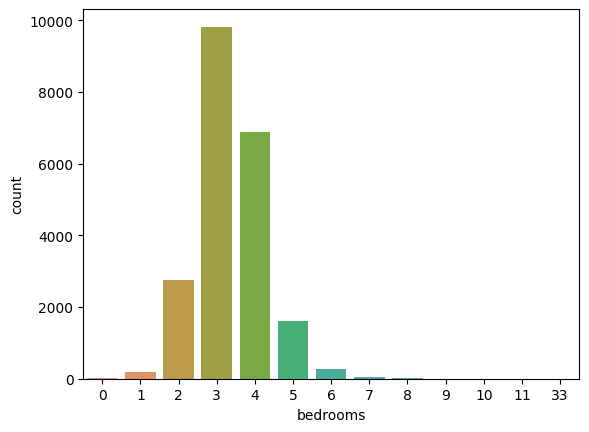

In [9]:
#Count the number of bedrooms
sns.countplot(x='bedrooms', data=df)


In [10]:
#We are going to see the correlation existing between all the futures and the price label.
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

We can see that the sqft_living *(Square footage of the apartments interior living space)* has a correlation of 0.70191, which is a good correlation with price.



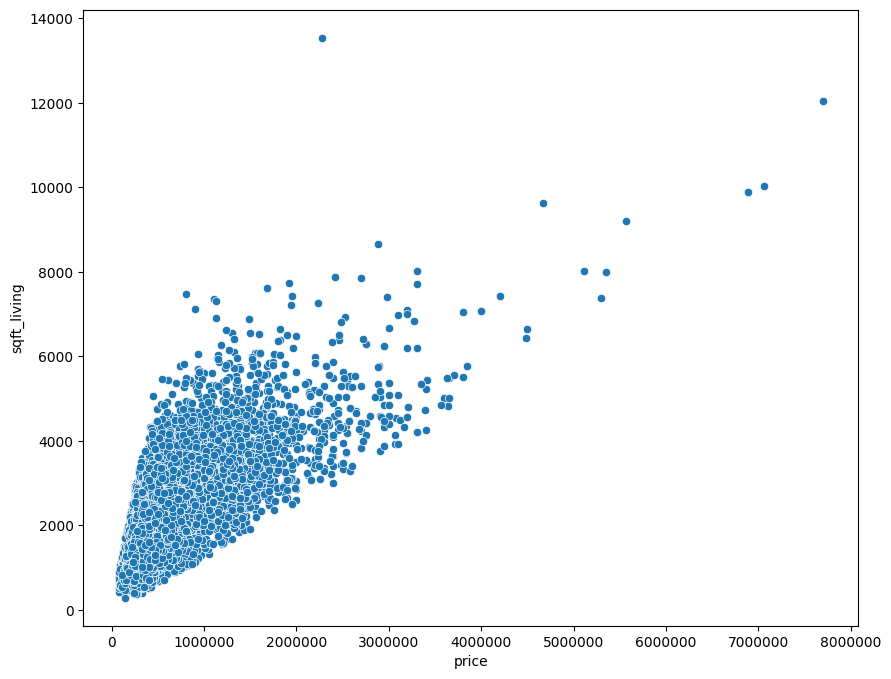

In [11]:
#Let's check the correlation with a scatterplot
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'price', y='sqft_living', data=df)
plt.ticklabel_format(style='plain', axis='both')

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

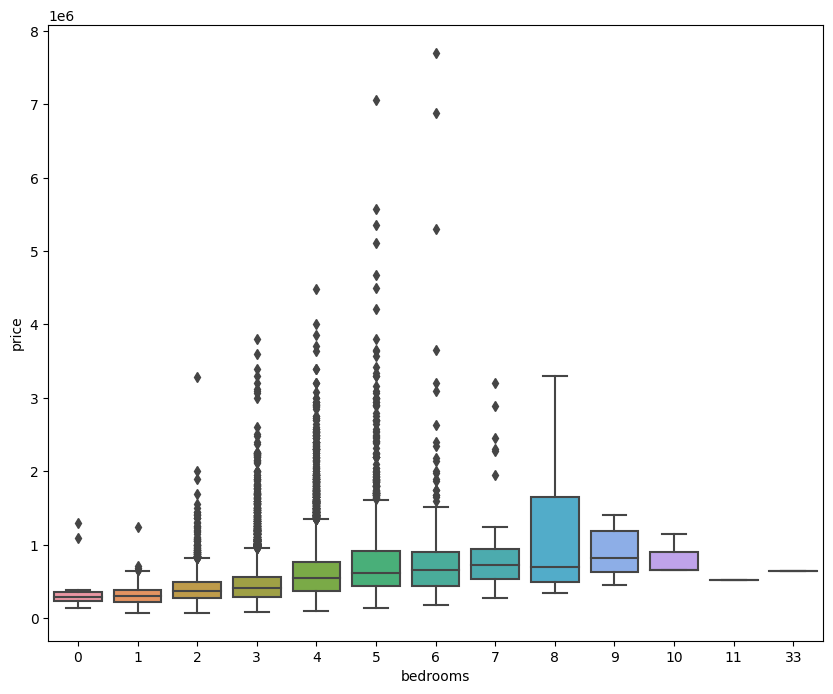

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x='bedrooms', y='price',data= df)

The boxplot shows the distribution of prices per bedrooms, I can see that there is quite a variety in prices of bedrooms between 3 and 7, which make sense because of the countplot from before it looks like the majority of the houses have bedrooms between 3 and 7.

### Visualizing the distribution of houses and their prices using Folium library

In [13]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [14]:
# Select relevant sub-columns
coor_df = df[['zipcode','lat', 'long', 'price']]
coor_df = coor_df.groupby(['price'], as_index=False).first()
coor_df = coor_df[['zipcode','lat', 'long', 'price']]
coor_df


zipcode      lat     long      price
0       98022  47.2638 -121.906    75000.0
1       98168  47.4739 -122.280    78000.0
2       98014  47.6499 -121.909    80000.0
3       98168  47.4808 -122.315    81000.0
4       98146  47.4987 -122.341    82000.0
...       ...      ...      ...        ...
4023    98004  47.6232 -122.220  5350000.0
4024    98039  47.6289 -122.233  5570000.0
4025    98039  47.6305 -122.240  6885000.0
4026    98004  47.6500 -122.214  7062500.0
4027    98102  47.6298 -122.323  7700000.0

[4028 rows x 4 columns]

In [15]:
coor_df['price'] = coor_df['price'].astype(str)
coor_df.dtypes

zipcode      int64
lat        float64
long       float64
price       object
dtype: object

In [16]:
# Start location is King County, USA
kingcounty_coordinate = [47.47, -121.84]
site_map = folium.Map(location=kingcounty_coordinate, zoom_start=10)
site_map

In [17]:
marker_cluster = MarkerCluster()
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)
for index, row in coor_df.iterrows():
    # create and add a Marker cluster to the site map
    coordinate = [row['lat'], row['long']]
    folium.map.Marker(coordinate).add_to(marker_cluster)
site_map

Display Prices with Pop-ups

In [18]:

# Initialize the map
site_map1 = folium.Map(location=kingcounty_coordinate, zoom_start=4)

# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for row in coor_df.iterrows():
    row_values= row[1]
    coordinate = [row_values['lat'], row_values['long']]
    popup= '<strong>' + row_values['price'] +'<strong>' 
    marker = folium.Marker(location=coordinate, popup= popup)
    marker.add_to(site_map1)
    #folium.Circle(coordinate, radius=100, color='#E033FF', fill=True).add_child(folium.Popup(row['price'])).add_to(site_map)
    #folium.map.Marker(coordinate, icon=DivIcon(icon_size=(10,10),icon_anchor=(0,0), html='<div style="font-size: 8; color: #E033FF;"><b>%s</b></div>' % row['zipcode'], )).add_to(site_map)
display(site_map1)


<AxesSubplot: xlabel='long', ylabel='lat'>

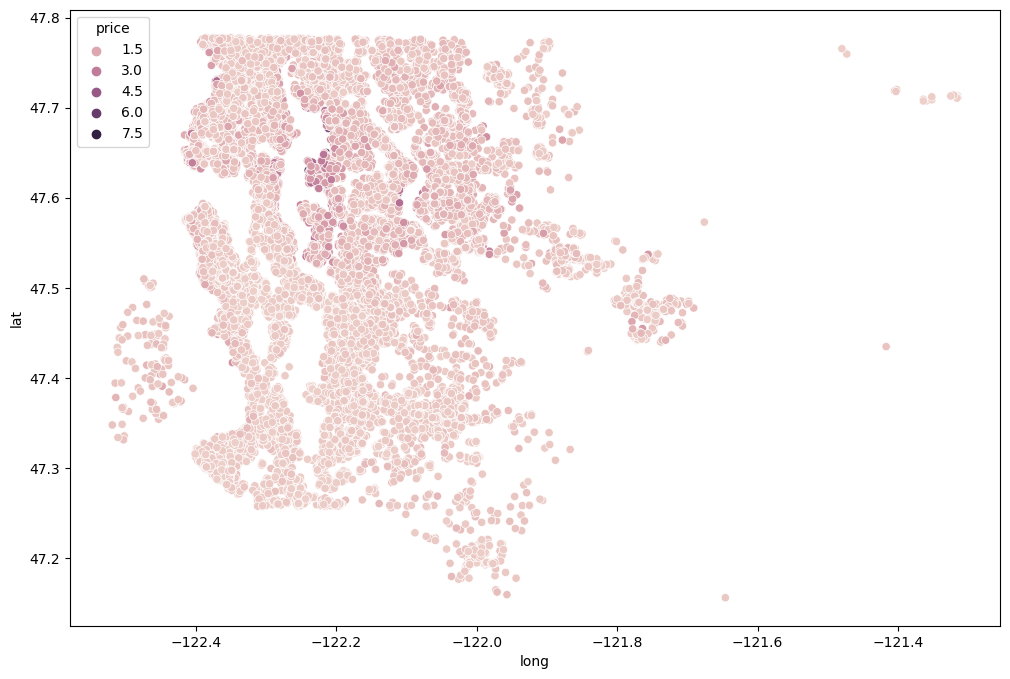

In [19]:
#Visualize the hottest prices

from matplotlib.colors import Colormap


plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [20]:
len(df)*0.01

216.13

In [21]:
#Dropping the 1% most expenses outliers to obtain a more clear distribution of the scartterplot of prices
non_top_1_perc= df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot: xlabel='long', ylabel='lat'>

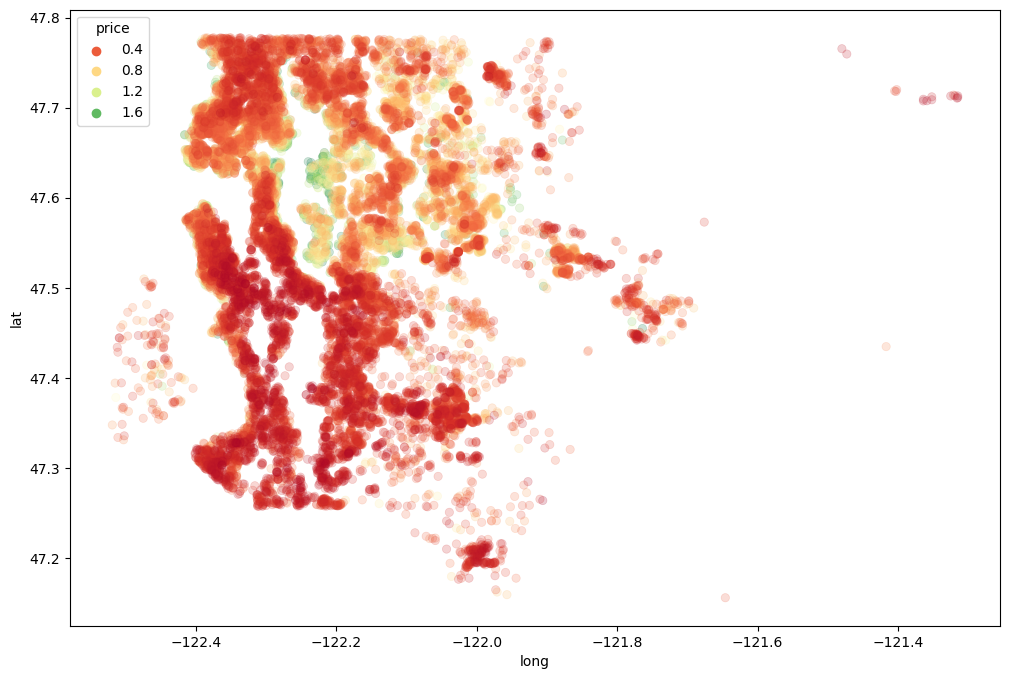

In [22]:
#Visualize the hottest prices

plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc, edgecolor=None, alpha=0.2, palette= 'RdYlGn',hue='price')

It looks like houses with waterfront are the most expensives.

<AxesSubplot: xlabel='waterfront', ylabel='price'>

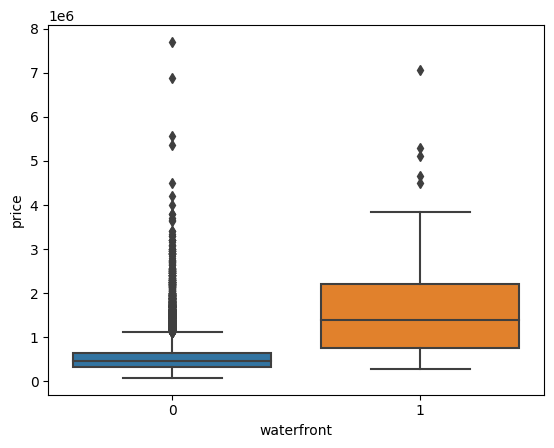

In [23]:
sns.boxplot(x='waterfront', y='price', data=df)

In [4]:
df= df.drop('id',axis=1)

In [5]:
df['date']= pd.to_datetime(df['date'])

In [6]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

<AxesSubplot: xlabel='year'>

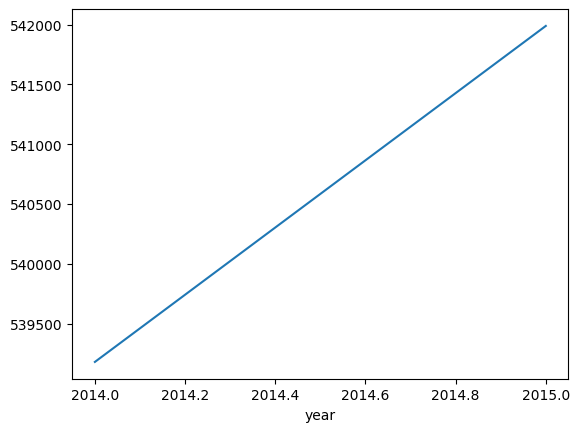

In [7]:
df.groupby('year').mean()['price'].plot()

In [8]:
df= df.drop('date',axis=1)


In [29]:
df['yr_renovated'].value_counts

<bound method IndexOpsMixin.value_counts of 0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64>

In [30]:
df['sqft_basement'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1        400
2          0
3        910
4          0
        ... 
21608      0
21609      0
21610      0
21611      0
21612      0
Name: sqft_basement, Length: 21613, dtype: int64>

## Split, Train, Test

In [31]:
X = df.drop('price',axis=1).values
y=df['price'].values

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape,y_test.shape)

Train set:  (15129, 20) (15129,)
Test set:  (6484, 20) (6484,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

2022-10-06 11:40:37.404427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-06 11:40:37.405276: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-06 11:40:37.405305: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (starhp): /proc/driver/nvidia/version does not exist
2022-10-06 11:40:37.406376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
model.fit(x=X_train, y=y_train, 
    validation_data=(X_test,y_test), 
    batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 423621066752.0000 - val_loss: 432983834624.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 422164824064.0000 - val_loss: 427692818432.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 400386654208.0000 - val_loss: 376749817856.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 298870833152.0000 - val_loss: 220063547392.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 144467574784.0000 - val_loss: 111262261248.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 101629681664.0000 - val_loss: 105524371456.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 99356491776.0000 - val_loss: 103738482688.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 97686798336.0000 - val_loss: 101948858368.0000
Epoch 9/400
119/11

In [37]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot: >

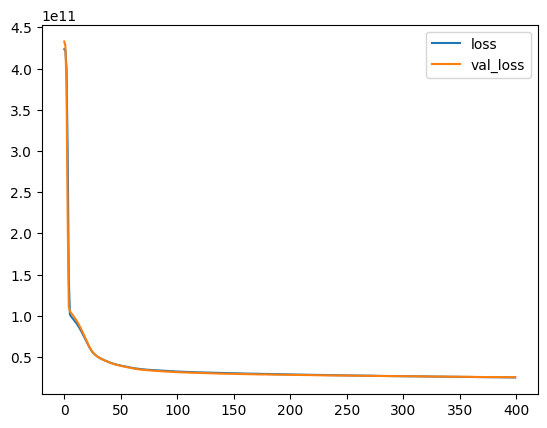

In [38]:
losses.plot()

As we can see, loss and validation loss go down and then continue down together. So there's no overfitting that we can see occurring here.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [40]:
mean_absolute_error(y_test, predictions)

100807.4079741961

In [41]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [42]:
(100132.47923855837 / 5.400881e+05)*100

18.5400269397823

18.54% of error is not a good parameter. \
But we can also do is use and explain the variance score to try to get a deeper understanding of our evaluation metrics.

In [43]:
explained_variance_score(y_test, predictions)

0.8182234259318182

So maybe it's worth it to try to keep training on the training data, since we technically haven't actually reached overfitting on it quite yet due to our analysis here.


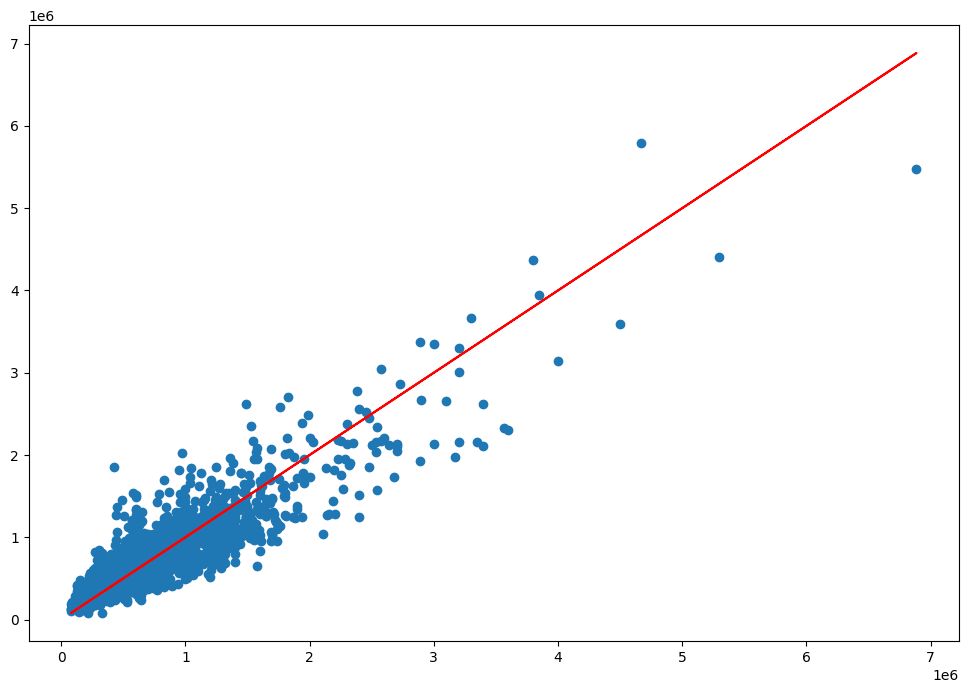

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,'r')

The red line represents the best or the basically the perfect prediction line. We notice that we're basically being punished here by the outliers (really expensives houses), but the model was pretty good at predicting the prices of houses between zero and two million dollars. \

What may be worth it is to retrain the model just on that bottom ninety nine percent of houses.

## Predict brand new houses

In [53]:
single_house= df.drop('price',axis=1).iloc[0]
print(single_house.shape)

(20,)


In [55]:
#Normalize the new data
single_house= single_house.values.reshape(-1,20)

In [56]:
single_house = Scaler.transform(single_house)

In [57]:
model.predict(single_house)

1/1 [==============================] - 0s 27ms/step


array([[271765.12]], dtype=float32)

In [59]:
df.head(1)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3        1.0         1180      5650     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  

[1 rows x 21 columns]

In [110]:
((271765.12-221900.0)/221900.0)*100

22.471888237945016

## Re-train the model dropping the 1% of the highest prices

In [47]:
df_99= df.sort_values('price',ascending=False).iloc[216:]

In [48]:
X99= df_99.drop('price',axis=1).values
y99= df_99['price'].values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X99, y99, test_size=0.2, random_state=101)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape,y_test.shape)

Train set:  (17117, 20) (17117,)
Test set:  (4280, 20) (4280,)


In [50]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [53]:
model.fit(x=X_train, y=y_train, 
    validation_data=(X_test,y_test), 
    batch_size=128, epochs=400)

Epoch 1/400
134/134 [==============================] - 1s 3ms/step - loss: 345600884736.0000 - val_loss: 365382729728.0000
Epoch 2/400
134/134 [==============================] - 0s 2ms/step - loss: 343464443904.0000 - val_loss: 357390057472.0000
Epoch 3/400
134/134 [==============================] - 0s 3ms/step - loss: 312428199936.0000 - val_loss: 285443260416.0000
Epoch 4/400
134/134 [==============================] - 0s 2ms/step - loss: 188969517056.0000 - val_loss: 115921887232.0000
Epoch 5/400
134/134 [==============================] - 0s 2ms/step - loss: 69800738816.0000 - val_loss: 62042324992.0000
Epoch 6/400
134/134 [==============================] - 0s 2ms/step - loss: 55844777984.0000 - val_loss: 60432986112.0000
Epoch 7/400
134/134 [==============================] - 0s 2ms/step - loss: 54901698560.0000 - val_loss: 59302739968.0000
Epoch 8/400
134/134 [==============================] - 0s 2ms/step - loss: 53975064576.0000 - val_loss: 58304159744.0000
Epoch 9/400
134/134 [===

<AxesSubplot: >

<Figure size 1200x800 with 0 Axes>

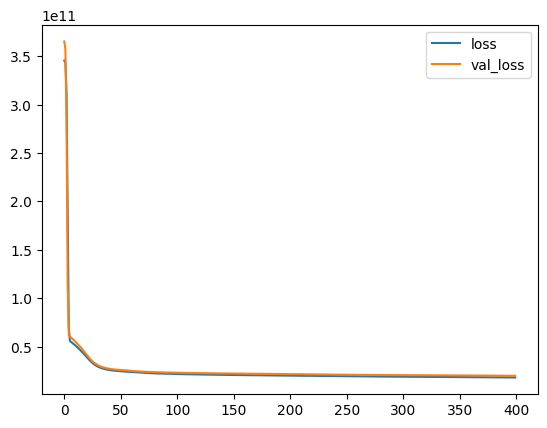

In [54]:
plt.figure(figsize=(12,8))
losses_99=pd.DataFrame(model.history.history)
losses_99.plot()


In [55]:
losses_99.describe()

loss      val_loss
count  4.000000e+02  4.000000e+02
mean   2.464098e+10  2.604942e+10
std    2.896644e+10  2.836820e+10
min    1.809547e+10  1.986461e+10
25%    1.886439e+10  2.051785e+10
50%    2.001331e+10  2.154981e+10
75%    2.167583e+10  2.301662e+10
max    3.456009e+11  3.653827e+11

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions_99 = model.predict(X_test)
mean_absolute_error(y_test, predictions_99)

134/134 [==============================] - 0s 1ms/step


93886.41399861273

In [57]:
df_99.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.139700e+04  21397.000000  21397.000000  21397.000000  2.139700e+04   
mean   5.181830e+05      3.360985      2.097537   2050.579707  1.499318e+04   
std    2.847527e+05      0.923908      0.746989    861.483593  4.097853e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.200000e+05      3.000000      1.500000   1420.000000  5.026000e+03   
50%    4.500000e+05      3.000000      2.250000   1900.000000  7.576000e+03   
75%    6.350000e+05      4.000000      2.500000   2520.000000  1.055000e+04   
max    1.965000e+06     33.000000      7.500000   7730.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21397.000000  21397.000000  21397.000000  21397.000000  21397.000000   
mean       1.490513      0.005328      0.216385      3.408282      7.626303   
std        0.539242      0.072799      0.729494      0.649548      1.135392   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

       ...  sqft_basement      yr_built  yr_renovated       zipcode  \
count  ...   21397.000000  21397.000000  21397.000000  21397.000000   
mean   ...     284.267841   1970.988316     82.267748  98078.079871   
std    ...     430.395339     29.307017    396.784910     53.471510   
min    ...       0.000000   1900.000000      0.000000  98001.000000   
25%    ...       0.000000   1951.000000      0.000000  98033.000000   
50%    ...       0.000000   1975.000000      0.000000  98065.000000   
75%    ...     550.000000   1997.000000      0.000000  98118.000000   
max    ...    3260.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15          year  \
count  21397.000000  21397.000000   21397.000000   21397.000000  21397.000000   
mean      47.559461   -122.213655    1971.626677   12696.738842   2014.322896   
std        0.139047      0.141223     668.086144   27203.128770      0.467594   
min       47.155900   -122.519000     399.000000     651.000000   2014.000000   
25%       47.469100   -122.329000    1480.000000    5100.000000   2014.000000   
50%       47.570700   -122.230000    1830.000000    7600.000000   2014.000000   
75%       47.678400   -122.124000    2340.000000   10022.000000   2015.000000   
max       47.777600   -121.315000    5790.000000  871200.000000   2015.000000   

              month  
count  21397.000000  
mean       6.575221  
std        3.116020  
min        1.000000  
25%        4.000000  
50%        6.000000  
75%        9.000000  
max       12.000000  

[8 rows x 21 columns]

In [65]:
(93886.41399861273/ 5.181830e+05)*100

18.1183894490195

In [59]:
explained_variance_score(y_test, predictions_99)

0.770322142730588

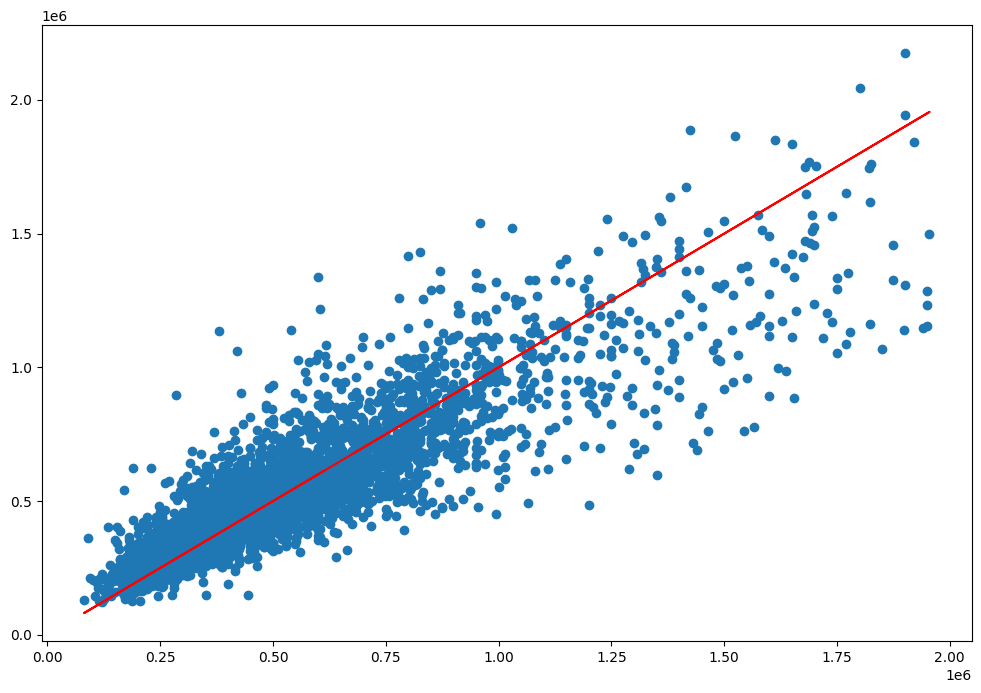

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, predictions_99)
plt.plot(y_test,y_test,'r')

In [61]:
single_house= df_99.drop('price',axis=1).iloc[1]

#Normalize the new data
single_house= single_house.values.reshape(-1,20)
single_house = Scaler.transform(single_house)
model.predict(single_house)

1/1 [==============================] - 0s 44ms/step


array([[1622844.]], dtype=float32)

In [62]:
df_99.head(1)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3281  1965000.0         5       3.75         3940     13738     1.5   

      waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
3281           0     3          4      9  ...              0      1951   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
3281             0    98004  47.6203 -122.212           2370       13320   

      year  month  
3281  2015      2  

[1 rows x 21 columns]

In [66]:
((1965000.0-1622844)/1965000.0)*100

17.412519083969467

Dropping the outliers and adjusting our splitting parameter did not make the model to perform much better than the first model.
